In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import os
import json
import pprint
from IPython.core.display import display
%matplotlib inline
import tweepy
import networkx as nx
import random
from pyvis.network import Network
from functions_file import *
import matplotlib.pyplot as plt
from pylab import rcParams
from networkx.algorithms.approximation import clique
from scipy import stats
data_folder = "data"
print("imported completed!")

imported completed!


In [10]:
consumer_key = "GvDHFIS3fpCfZR2hwEGhE5oCZ"
consumer_secret = "LCwgUZgFOjJppd4jg6Cf4mgohUTc6Ro7Yaals87LdNLmS3d9zB"
access_token = "810960428385890304-aVlOFR9EExKdDPZCsh5EDN5Nm9SUmb9"
access_secret = "XJkr9dKABPkSvRIgpyQeNapg2o6ldP4VoNbTids9QXGWT"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAA8UJQEAAAAAOD26yUUUPHF9zeAe56TtzGYUK8Q%3DRh6u9TAI7T7b5TJABTBOP5WwWSL0Cbvv5a6JJwg8MursyOOt9L"

In [11]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
if api.verify_credentials :
  print ('Authentication completed successfully!')

Authentication completed successfully!


In [56]:
users = ["lucabazzetto","Tomve99"]
usersId = Functions.usersID(users,api)

In [57]:
quantity = 4
followers = {}
for idUser in usersId:
    followers[idUser] = Functions.download_followers(idUser, quantity,api)
Functions.serialize_json(data_folder,"followersLucaThomas.json", followers)

Data serialized to path: data/followersLucaThomas.json


In [58]:
quantity = 4
friends = {}
for idUser in usersId:
    friends[idUser] = Functions.download_following(idUser, quantity,api)
Functions.serialize_json(data_folder,"friendsLucaThomas.json", friends)

Data serialized to path: data/friendsLucaThomas.json


In [61]:
followersALL = Functions.read_json(f"{data_folder}/followersLucaThomas.json")
fiveFollowers = []
# Estraggo per ogni utente 5 followers
quantity = 1
for user in followersALL:
    fiveFollowers.extend(Functions.random_json_with_control(followersALL[user], quantity, fiveFollowers))

quantity = 2
followersOfFollowers = {}
for idUser in fiveFollowers:
    followersOfFollowers[idUser] = Functions.download_followers(idUser, quantity,api)

Functions.serialize_json(data_folder,"followersOfFollowers.json", followersOfFollowers)

Data read fron path: data/followersLucaThomas.json
Data serialized to path: data/followersOfFollowers.json


In [62]:
friendsALL = Functions.read_json(f"{data_folder}/friendsLucaThomas.json")
fiveFriends = []
# Estraggo per ogni utente 5 followers
quantity = 1
for user in friendsALL:
    fiveFriends.extend(Functions.random_json_with_control(friendsALL[user], quantity, fiveFriends))

quantity = 2
friendsOfFriends = {}
for idUser in fiveFriends:
    friendsOfFriends[idUser] = Functions.download_following(idUser,quantity,api)
Functions.serialize_json(data_folder,"friendsOfFriends.json", friendsOfFriends)

Data read fron path: data/friendsLucaThomas.json
Data serialized to path: data/friendsOfFriends.json


In [9]:
file_names = [
    f"{data_folder}/followersOfFollowers.json",
    f"{data_folder}/friendsOfFriends.json",
    f"{data_folder}/friendsLucaThomas.json",
    f"{data_folder}/followersLucaThomas.json"
]
#creo vettore con tutti gli id degli utenti senza duplicazione
vector =  Functions.deleteDuplicates(Functions.json_items_to_dict(file_names))

Functions.serialize_json(data_folder,"noDuplicati.json", vector)

Data read fron path: data/friendsOfFriends.json
Data read fron path: data/followersOfFollowers.json
Data read fron path: data/followersLucaThomas.json
Data read fron path: data/friendsLucaThomas.json
Data serialized to path: data/noDuplicati.json


In [4]:
vector = Functions.read_json(f"{data_folder}/noDuplicati.json")
index = 0
usersDetails = {}
for userId in vector:
    usersDetails[index] = Functions.downlodUserDetails(userId,api)
    index = index + 1

df = pd.DataFrame.from_dict(usersDetails,orient='index')
display(df)
df.to_csv("usersDetails.csv", index=False, encoding='utf-8')

Data read fron path: data/noDuplicati.json


,id,name,screen_name,location,followers_count,friends_count
0,1252717049287237632,Ciccio Feltri,ciccio_feltri,,7,15
1,426038638,Thomas Verardo,Tomve99,,18,57
2,523623748,Agustin Campagnolo,crispy_mcbacon,"Azzano decimo, Pordenone",25,43
3,307423967,giuseppe cruciani,giucruciani,,442535,1478
4,810960428385890304,Luca Bazzetto,lucabazzetto,,4,30
5,44196397,Elon Musk,elonmusk,,40250630,101


In [7]:
list = Functions.read_json(f"{data_folder}/noDuplicati.json")
index = 0
sourceTarget ={}

for source in list:
    for target in list:
        if not Functions.searchInDict(source,target,sourceTarget):
            relation = Functions.friendship(source,target,api)
            if relation:
                foundFriendship = {
                    "id" : index,
                    "source": source,
                    "target": target,
                    "friendship": relation
                }
                sourceTarget[index] = foundFriendship
                index = index + 1

df = pd.DataFrame.from_dict(sourceTarget,orient='index')
display(df)
df.to_csv("sourceTarget.csv",index = False , encoding='utf-8')

Data read fron path: data/noDuplicati.json


,id,source,target,friendship
0,0,1252717049287237632,426038638,both
1,1,1252717049287237632,523623748,both
2,2,1252717049287237632,307423967,sourceToTarget
3,3,1252717049287237632,810960428385890304,both
4,4,426038638,523623748,both
5,5,426038638,810960428385890304,both
6,6,426038638,44196397,sourceToTarget
7,7,523623748,810960428385890304,both
8,8,810960428385890304,307423967,sourceToTarget
9,9,810960428385890304,44196397,sourceToTarget


,id,source,target,friendship
0,0,1252717049287237632,426038638,both
1,1,1252717049287237632,523623748,both
2,2,1252717049287237632,307423967,sourceToTarget
3,3,1252717049287237632,810960428385890304,both
4,4,426038638,523623748,both
5,5,426038638,810960428385890304,both
6,6,426038638,44196397,sourceToTarget
7,7,523623748,810960428385890304,both
8,8,810960428385890304,307423967,sourceToTarget
9,9,810960428385890304,44196397,sourceToTarget


In [5]:
dfUsersDetails = pd.read_csv("usersDetails.csv")
dfUsersFriendship = pd.read_csv("sourceTarget.csv")

graph = nx.DiGraph()

#aggiunta membri gruppo come attributi
graph.graph["members"] = ["Luca","Thomas","Agustin","Edoardo"]

for index,row in dfUsersDetails.iterrows():
    graph.add_node(row['id'], name = row['name'],screen_name=row['screen_name'],location = row['location'],followers_count = row['followers_count'],friends_count = row['friends_count'])

#print(graph.nodes.data())

for index, row in dfUsersFriendship.iterrows():
    if row["friendship"] == "sourceToTarget":
        graph.add_edge(row["source"], row["target"])
    elif row["friendship"] == "TargetToSource" :
        graph.add_edge(row["target"], row["source"])
    else :
        graph.add_edge(row["source"], row["target"])
        graph.add_edge(row["target"], row["source"])

nx.write_gpickle(graph,"data/orientedGraph.pkl")

In [34]:
dfUsersDetails = pd.read_csv("usersDetails.csv")
dfUsersFriendship = pd.read_csv("sourceTarget.csv")

graph = nx.Graph()
#aggiunta membri gruppo come attributi
graph.graph["members"] = ["Luca","Thomas","Agustin","Edoardo"]

for index,row in dfUsersDetails.iterrows():
    graph.add_node(row['id'], label = row['screen_name'],location = row['location'],followers_count = row['followers_count'],friends_count = row['friends_count'])

for index, row in dfUsersFriendship.iterrows():
    graph.add_edge(row["source"], row["target"],id = row['id'])

nx.write_gpickle(graph,"data/unOrientedGraph.pkl")

In [35]:
#punto 6

graph = nx.read_gpickle("data/unOrientedGraph.pkl")

nt = Network(
    height="100%",
    width="100%",
    bgcolor="222222",
    font_color="white",
    heading="progetto"
)
nt.barnes_hut()
nt.from_nx(graph)
neighbor_map = nt.get_adj_list()
for node in nt.nodes:
    node["Value"] = len(neighbor_map[node['id']])
nt.show("grafico.html")

In [6]:
from networkx.algorithms.distance_measures import center

noOriented = nx.read_gpickle("data/unOrientedGraph.pkl")
oriented = nx.read_gpickle("data/orientedGraph.pkl")

if(nx.is_connected(noOriented)):
    print("Grafo connesso"),
    print("Centro: ", end=" ")
    print(nx.center(noOriented))
    print("Diametro: ", end=" ")
    print(nx.diameter(noOriented))
    print("Raggio: ", end=" ")
    print(nx.radius(noOriented))

else:
    print("Grafo non connesso")
    print("Centralità di grado: ", end=" ") #solo in grafi bipartiti
    print(nx.degree_centrality(noOriented))
    print(" ")

if(nx.is_bipartite(noOriented)):
    print("Grafo bipartito")
else:
    print("Grafo non bipartito")

bet = nx.betweenness_centrality(noOriented)
close = nx.closeness_centrality(noOriented)
degree = nx.degree_centrality(noOriented)
ind = nx.in_degree_centrality(oriented)
outd = nx.out_degree_centrality(oriented)
pr = nx.pagerank(oriented)
hub, authorities = nx.hits(oriented)

print("Centralità del mezzo: ", end=" ")
print(bet)
print(" ")
print("Centralità della vicinanza: ", end=" ")
print(close)
print(" ")

print("In-degree centrality: ", end=" ")
print(ind)
print(" ")
print("Out-degree centrality: ", end=" ")
print(outd)
print(" ")
#Da vedere se bisogna modificare alpha (non so cosa sia) e altri parametri
print("Page Rank: ", end=" ")
print(pr)
print(" ")
print("HITS hub: ", end=" ")
print(hub)
print(" ")
print("HITS authority: ", end=" ")
print(authorities)
print(" ")

Grafo connesso
Centro:  [810960428385890304]
Diametro:  2
Raggio:  1
Grafo non bipartito
Centralità del mezzo:  {1252717049287237632: 0.1, 426038638: 0.1, 523623748: 0.0, 307423967: 0.0, 810960428385890304: 0.30000000000000004, 44196397: 0.0}
 
Centralità della vicinanza:  {1252717049287237632: 0.8333333333333334, 426038638: 0.8333333333333334, 523623748: 0.7142857142857143, 307423967: 0.625, 810960428385890304: 1.0, 44196397: 0.625}
 
In-degree centrality:  {1252717049287237632: 0.6000000000000001, 426038638: 0.6000000000000001, 523623748: 0.6000000000000001, 307423967: 0.4, 810960428385890304: 0.6000000000000001, 44196397: 0.4}
 
Out-degree centrality:  {1252717049287237632: 0.8, 426038638: 0.8, 523623748: 0.6000000000000001, 307423967: 0.0, 810960428385890304: 1.0, 44196397: 0.0}
 
Page Rank:  {1252717049287237632: 0.18362997802196654, 426038638: 0.18362997802196654, 523623748: 0.1734940405844774, 307423967: 0.13447289769598292, 810960428385890304: 0.19030020797962371, 44196397: 0.1

Cricca massima:  {810960428385890304, 1252717049287237632, 523623748, 426038638}
 
Dimensione della cricca massima:  4
 


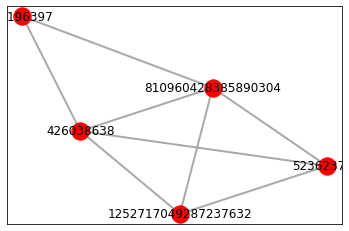

In [15]:
oriented = nx.read_gpickle("data/orientedGraph.pkl")

#genero sottografo
subgraph = nx.ego_graph(noOriented,  Functions.userID("Tomve99",api), radius=1)

#cricca massima
print("Cricca massima: ", end=" ")
print(clique.max_clique(subgraph))
print(" ")

#dimensione cricca massima
print("Dimensione della cricca massima: ", end=" ")
print(clique.large_clique_size(subgraph))
print(" ")

nx.draw_networkx(
    subgraph,
    pos = nx.spring_layout(subgraph),
    node_color = "#FF0000",
    edge_color = "#A9A9A9",
    width = 2,
    edge_cmap = plt.cm.Blues,
    with_labels = True
)
plt.savefig("data/subgraph.pdf")
plt.show()
plt.close()

In [13]:
#copertura minima degli archi
noOriented = nx.read_gpickle("data/unOrientedGraph.pkl")

print("Copertura minima degli archi: ", end=" ")
print(nx.min_edge_cover(noOriented))
print(" ")

Copertura minima degli archi:  {(1252717049287237632, 523623748), (810960428385890304, 307423967), (44196397, 426038638)}
 


In [63]:
noOriented = nx.read_gpickle("data/unOrientedGraph.pkl")

print("Coefficiente omega: ", end=" ")
print(nx.omega(noOriented))
print(" ")
print("Coefficiente sigma: ", end=" ")
print(nx.sigma(noOriented))
print(" ")

Coefficiente omega:  3.3306690738754696e-16
 
Coefficiente sigma:  1.0
 


In [8]:
#Punto 13 Correlazione di Pearson
noOriented = nx.read_gpickle("data/unOrientedGraph.pkl")
oriented = nx.read_gpickle("data/orientedGraph.pkl")
bet = nx.betweenness_centrality(noOriented)
close = nx.closeness_centrality(noOriented)
degree = nx.degree_centrality(noOriented)
ind = nx.in_degree_centrality(oriented)
outd = nx.out_degree_centrality(oriented)
pr = nx.pagerank(oriented)
hub, authorities = nx.hits(oriented)


allCent = [bet, close, degree, ind, outd, pr, hub, authorities]
allCent1 = np.empty((0,8), int)
dataTab = np.empty((0,8), int)

n_nodes = noOriented.number_of_nodes()

allCent1 = Functions.converterNumber(allCent, n_nodes)

tab = {}
tabTemp = {}
names = ["Betweenness", "Closeness", "Degree", "In-Degree", "Out-Degree", "Page Rank", "Hub", "Authorities"]
y = 0
res = []
#calcolo indice
for i in range(0,8):
    res.clear()
    for j in range(0,8):
        res.append(stats.stats.pearsonr(allCent1[i], allCent1[j]))

    x = 0
    tabTemp.clear()
    for re in res:
        nameCol = names[x]
        tabTemp[nameCol] = re
        x = x + 1

    nameRow = names[y]
    tab[nameRow] = tabTemp.copy()
    y = y + 1

df = pd.DataFrame.from_dict(tab,orient='index')
display(df)

,Betweenness,Closeness,Degree,In-Degree,Out-Degree,Page Rank,Hub,Authorities
Betweenness,"(1.0, 0.0)","(0.9485916782162365, 0.0038962919668650924)","(0.8946750577612209, 0.016055812306949784)","(0.5521576303742326, 0.255933924922528)","(0.765547332155259, 0.07600837679936666)","(0.7030393289095214, 0.11918462681837855)","(0.7420630911731738, 0.09121671526365795)","(0.26204666690765893, 0.615927169599252)"
Closeness,"(0.9485916782162365, 0.0038962919668650924)","(0.9999999999999999, 1.8488927466117464e-32)","(0.989926995576015, 0.00015168709638560028)","(0.7808966350072852, 0.06675025758372091)","(0.9283048639634293, 0.007526025395560632)","(0.8904192495558891, 0.01735399171604556)","(0.9140368281093699, 0.0107668807783534)","(0.5400804119536685, 0.2686465594958184)"
Degree,"(0.8946750577612209, 0.016055812306949784)","(0.989926995576015, 0.00015168709638560028)","(0.9999999999999999, 1.8488927466117464e-32)","(0.8528028654224418, 0.030905834747225285)","(0.9683296637314884, 0.00148863246389365)","(0.942489359541586, 0.004866103181616234)","(0.9583258163427377, 0.002568917814739231)","(0.6397117210540251, 0.1713273796031374)"
In-Degree,"(0.5521576303742326, 0.255933924922528)","(0.7808966350072852, 0.06675025758372091)","(0.8528028654224418, 0.030905834747225285)","(0.9999999999999999, 1.8488927466117464e-32)","(0.9561828874675149, 0.0028378459267344508)","(0.9775842487264439, 0.0007480672823601672)","(0.9664532069555747, 0.0016692044175290184)","(0.9469440459303775, 0.004147726881893687)"
Out-Degree,"(0.765547332155259, 0.07600837679936666)","(0.9283048639634293, 0.007526025395560632)","(0.9683296637314884, 0.00148863246389365)","(0.9561828874675149, 0.0028378459267344508)","(1.0, 0.0)","(0.9957454254002437, 2.7113600648317958e-05)","(0.9993018758738812, 7.308958182794715e-07)","(0.8113558562153449, 0.050023316408063984)"
Page Rank,"(0.7030393289095214, 0.11918462681837855)","(0.8904192495558891, 0.01735399171604556)","(0.942489359541586, 0.004866103181616234)","(0.9775842487264439, 0.0007480672823601672)","(0.9957454254002437, 2.7113600648317958e-05)","(1.0, 0.0)","(0.9983003925756383, 4.330543296840567e-06)","(0.8587569999197496, 0.028515507984565015)"
Hub,"(0.7420630911731738, 0.09121671526365795)","(0.9140368281093699, 0.0107668807783534)","(0.9583258163427377, 0.002568917814739231)","(0.9664532069555747, 0.0016692044175290184)","(0.9993018758738812, 7.308958182794715e-07)","(0.9983003925756383, 4.330543296840567e-06)","(0.9999999999999998, 7.395570986446985e-32)","(0.8326282438352701, 0.039675639135529794)"
Authorities,"(0.26204666690765893, 0.615927169599252)","(0.5400804119536685, 0.2686465594958184)","(0.6397117210540251, 0.1713273796031374)","(0.9469440459303775, 0.004147726881893687)","(0.8113558562153449, 0.050023316408063984)","(0.8587569999197496, 0.028515507984565015)","(0.8326282438352701, 0.039675639135529794)","(1.0, 0.0)"


In [9]:
noOriented = nx.read_gpickle("data/unOrientedGraph.pkl")
oriented = nx.read_gpickle("data/orientedGraph.pkl")
bet = nx.betweenness_centrality(noOriented)
close = nx.closeness_centrality(noOriented)
degree = nx.degree_centrality(noOriented)
ind = nx.in_degree_centrality(oriented)
outd = nx.out_degree_centrality(oriented)
pr = nx.pagerank(oriented)
hub, authorities = nx.hits(oriented)

allCent = [bet, close, degree, ind, outd, pr, hub, authorities]
res = []
allCent1 = np.empty((0,8), int)
dataTab = np.empty((0,8), int)

n_nodes = noOriented.number_of_nodes()

allCent1 = Functions.converterNumber(allCent, n_nodes)


tab = {}
tabTemp = {}
names = ["Betweenness", "Closeness", "Degree", "In-Degree", "Out-Degree", "Page Rank", "Hub", "Authorities"]
y = 0
tau = []
pvalue = []
#calcolo indice
for i in range(0,8):
    tau.clear()
    pvalue.clear()
    tabTemp.clear()
    for j in range(0,8):
        tauTemp, pvalueTemp = stats.kendalltau(allCent1[i], allCent1[j])
        tau.append(tauTemp)
        pvalue.append(pvalueTemp)
    x = 0
    tabTemp.clear()
    for ta in tau:
        nameCol = names[x]
        tabTemp[nameCol] = "(" + str(ta) + ", " + str(pvalue[x]) + ")"
        x = x + 1

    nameRow = names[y]
    tab[nameRow] = tabTemp.copy()
    y = y + 1

df = pd.DataFrame.from_dict(tab,orient='index')
display(df)

,Betweenness,Closeness,Degree,In-Degree,Out-Degree,Page Rank,Hub,Authorities
Betweenness,"(1.0, 0.014145444224306181)","(0.9198662110077999, 0.019563281856830587)","(0.9198662110077999, 0.019563281856830587)","(0.6396021490668313, 0.13361440253771617)","(0.9198662110077999, 0.019563281856830587)","(0.9198662110077999, 0.019563281856830587)","(0.9198662110077999, 0.019563281856830587)","(0.08058229640253803, 0.8345908910507341)"
Closeness,"(0.9198662110077999, 0.019563281856830587)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(0.7844645405527361, 0.05653027716740425)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(0.22237479499833038, 0.5521929874088278)"
Degree,"(0.9198662110077999, 0.019563281856830587)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(0.7844645405527361, 0.05653027716740425)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(0.22237479499833038, 0.5521929874088278)"
In-Degree,"(0.6396021490668312, 0.13361440253771617)","(0.7844645405527361, 0.05653027716740425)","(0.7844645405527361, 0.05653027716740425)","(0.9999999999999999, 0.025347318677468277)","(0.7844645405527361, 0.05653027716740425)","(0.7844645405527361, 0.05653027716740425)","(0.7844645405527361, 0.05653027716740425)","(0.7559289460184544, 0.060289173990602164)"
Out-Degree,"(0.9198662110077999, 0.019563281856830587)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(0.7844645405527361, 0.05653027716740425)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(0.22237479499833038, 0.5521929874088278)"
Page Rank,"(0.9198662110077999, 0.019563281856830587)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(0.7844645405527361, 0.05653027716740425)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(0.22237479499833038, 0.5521929874088278)"
Hub,"(0.9198662110077999, 0.019563281856830587)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(0.7844645405527361, 0.05653027716740425)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(1.0, 0.008765863937712937)","(0.22237479499833038, 0.5521929874088278)"
Authorities,"(0.08058229640253803, 0.8345908910507341)","(0.22237479499833038, 0.5521929874088278)","(0.22237479499833038, 0.5521929874088278)","(0.7559289460184544, 0.060289173990602164)","(0.22237479499833038, 0.5521929874088278)","(0.22237479499833038, 0.5521929874088278)","(0.22237479499833038, 0.5521929874088278)","(1.0, 0.006435091231559125)"


In [ ]:
#Provo a disegnarlo (non scritto nella consegna)

rcParams['figure.figsize'] = 10,10

nx.draw_networkx(
    oriented,
    pos = nx.spring_layout(oriented),
    node_color = "#FF0000",
    width = 2,
    edge_cmap = plt.cm.Blues,
    with_labels = True
)
plt.show()
plt.close()